In [1]:
pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [71]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from sklearn.metrics import silhouette_score
from umap import UMAP

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls

drive/  sample_data/


In [5]:
cd drive/MyDrive/Data/NLP

/content/drive/MyDrive/Data/NLP


In [6]:
df = pd.read_csv("./questions_data_clean_stopword_lemma_v4.csv", header=0, encoding='utf-8')
df.head()

,Title,Description,Creation Time,Link,Clean_Text_Init,Clean_Text_Stopword,Clean_Text_Stopword_Lemma
0,Natural language date/time parser for .NET?,<p>Does anyone know of a .NET date/time parser...,22/08/2008 22:45,https://stackoverflow.com/questions/23689/natu...,natural language date time parser for net does...,natural language date time parser net anyone k...,natural language date time parser net anyone k...
1,Vista speech recognition in multiple languages,"<p>my primary language is spanish, but I use a...",31/08/2008 1:08,https://stackoverflow.com/questions/36533/vist...,vista speech recognition in multiple languages...,vista speech recognition multiple languages pr...,vista speech recognition multiple language pri...
2,How do you implement a &quot;Did you mean&quot;?,<blockquote>\r\n <p><strong>Possible Duplicat...,3/09/2008 10:36,https://stackoverflow.com/questions/41424/how-...,how do you implement did you mean possible dup...,implement mean possible duplicate suppose sear...,implement mean possible duplicate suppose sear...
3,Is there an algorithm that tells the semantic ...,"<p>input: phrase 1, phrase 2</p>\r\n\r\n<p>out...",15/09/2008 12:26,https://stackoverflow.com/questions/62328/is-t...,is there an algorithm that tells the semantic ...,algorithm tells semantic similarity two phrase...,algorithm tell semantic similarity two phrase ...
4,How to read values from numbers written as words?,<p>As we all know numbers can be written eithe...,16/09/2008 7:47,https://stackoverflow.com/questions/70161/how-...,how to read values from numbers written as wor...,read values numbers written words know numbers...,read value number written word know number wri...


In [7]:
docs = df['Clean_Text_Stopword_Lemma'].to_list()
docs[:5]

['natural language date time parser net anyone know net date time parser similar handle stuff like tomorrow pm next thursday note write ruby know chronic project must use net',
 'vista speech recognition multiple language primary language spanish use software english including window however would like use speech recognition spanish know way use vista speech recognition language primary o language',
 'implement mean possible duplicate suppose search system already website implement mean like google',
 'algorithm tell semantic similarity two phrase input phrase phrase output semantic similarity value probability two phrase talking thing',
 'read value number written word know number written either numerics called name lot example found convert one hundred twenty three could find good example convert way around caveat cardinal nominal ordinal one first common spelling mistake forty fourty hundred thousand twenty one hundred also two thousand one hundred separator eleven hundred fifty two

In [8]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("sentence-transformers/all-MiniLM-L12-v2",  device="cuda")
base_bertopic = BERTopic(embedding_model=sentence_model)
base_topic_model = base_bertopic.fit(docs)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [30]:
base_topic_pd = base_topic_model.get_topic_info()
base_topic_pd.head(13)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10529,-1_model_word_sentence_text,"[model, word, sentence, text, file, using, lik...",[parsing sentence using stanford parser nltk p...
1,0,1143,0_dataframe_column_panda_count,"[dataframe, column, panda, count, row, frame, ...",[iterate row dataframe returning result row co...
2,1,516,1_file_read_line_txt,"[file, read, line, txt, write, reading, text, ...",[read specific string line text file using buf...
3,2,384,2_natural_language_nlp_processing,"[natural, language, nlp, processing, search, q...",[nlp natural language processing detect questi...
4,3,358,3_classification_classifier_label_svm,"[classification, classifier, label, svm, featu...",[fast way train many model time want train way...
5,4,345,4_nltk_install_import_installed,"[nltk, install, import, installed, download, p...",[python failed import nltk script work interpr...
6,5,319,5_jquery_javascript_div_html,"[jquery, javascript, div, html, click, element...",[difference text html jquery possible duplicat...
7,6,286,6_tagger_tag_po_tagging,"[tagger, tag, po, tagging, tagged, nltk, speec...",[output result conll format po tagging stanfor...
8,7,280,7_cs_div_center_width,"[cs, div, center, width, align, image, wrap, h...",[set image behind text using cs trying auto ce...
9,8,272,8_spacy_install_microsoft_program,"[spacy, install, microsoft, program, pip, pack...",[spacy showing import module error already ins...


In [10]:
len(base_topic_pd)

205

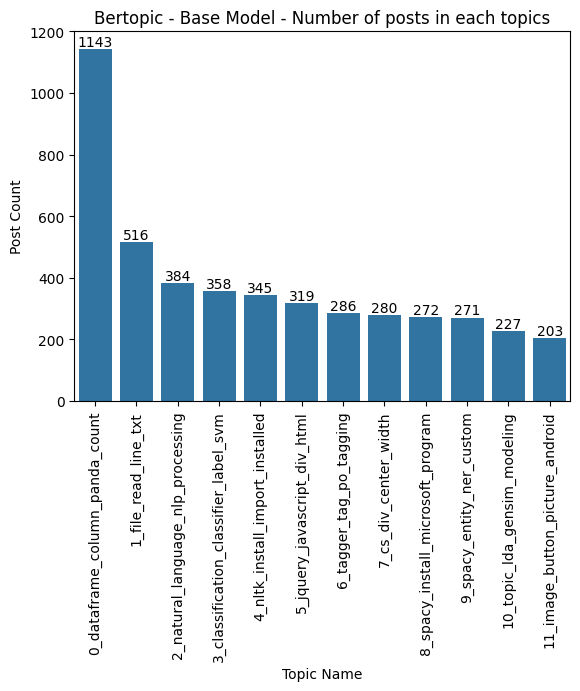

In [28]:
ax = sns.barplot(x=base_topic_pd['Name'][1:13], y=base_topic_pd['Count'][1:13])
ax.bar_label(ax.containers[0])

plt.title('Bertopic - Base Model - Number of posts in each topics')
plt.xlabel('Topic Name')
plt.ylabel('Post Count')
plt.xticks(rotation=90)
plt.show()

In [16]:
base_topic_pd_100count = base_topic_pd[base_topic_pd['Count'] >= 100]
len(base_topic_pd_100count)

38

In [29]:
base_topic_model.visualize_barchart(top_n_topics=12,
                                    n_words=10,
                                    width=300,
                                    height=300,
                                    title = 'Bertopic - Base Model - Topic Word Scores')

# Bigram - Topic Model

In [18]:
bigram_bertopic = BERTopic(n_gram_range = (2,2),
                    embedding_model=sentence_model)
bigram_topic_model = bigram_bertopic.fit(docs)

In [19]:
bigram_topic_pd = bigram_topic_model.get_topic_info()
bigram_topic_pd.head(11)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10402,-1_would like_word vec_text file_look like,"[would like, word vec, text file, look like, s...",[use error trying use gensim word vec trying r...
1,0,1286,0_sentiment analysis_naive bayes_positive nega...,"[sentiment analysis, naive bayes, positive neg...",[quantifying sentiment analysis using python u...
2,1,865,1_text file_txt file_line text_read text,"[text file, txt file, line text, read text, lo...",[problem reading text file trying read text tx...
3,2,450,2_using jquery_input field_text input_get text,"[using jquery, input field, text input, get te...",[using jquery change html text input password ...
4,3,427,3_data frame_panda dataframe_new column_datafr...,"[data frame, panda dataframe, new column, data...",[tokenizing word new column panda dataframe tr...
5,4,380,4_natural language_language processing_search ...,"[natural language, language processing, search...",[search engine give direct answer wondering se...
6,5,298,5_parse tree_nltk tree_stanford parser_depende...,"[parse tree, nltk tree, stanford parser, depen...",[get stanford style parse tree noun phrase ver...
7,6,275,6_program file_file microsoft_install spacy_ap...,"[program file, file microsoft, install spacy, ...",[spacy showing import module error already ins...
8,7,265,7_install nltk_import nltk_nltk download_nltk ...,"[install nltk, import nltk, nltk download, nlt...",[import nltk working xampp new python nltk pro...
9,8,256,8_html cs_align text_text overflow_text wrap,"[html cs, align text, text overflow, text wrap...",[insert image text keep text wrapping cs encou...


In [20]:
len(bigram_topic_pd)

188

In [21]:
bigram_topic_pd_100count = bigram_topic_pd[bigram_topic_pd['Count'] >= 100]
len(bigram_topic_pd_100count)

34

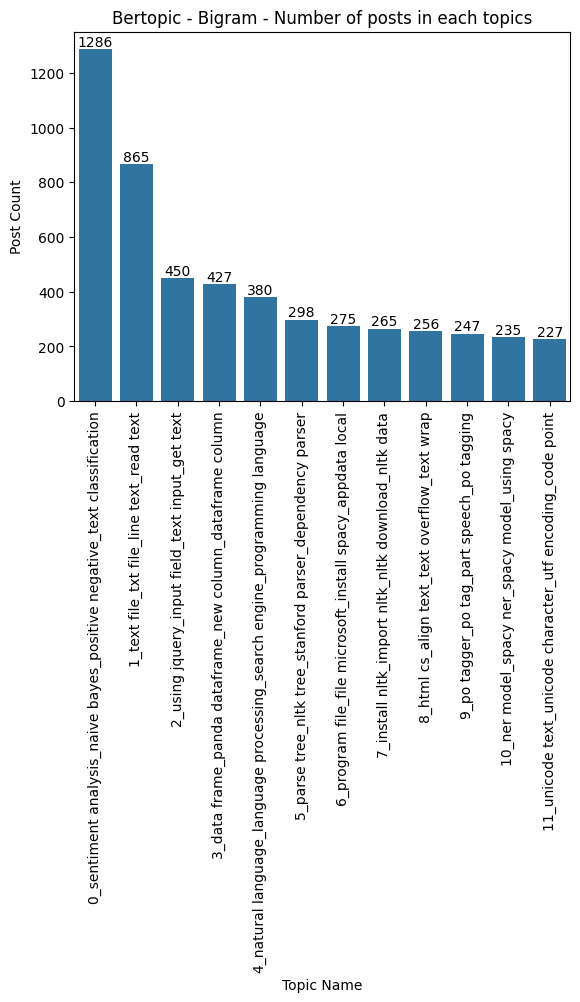

In [27]:
ax = sns.barplot(x=bigram_topic_pd['Name'][1:13], y=bigram_topic_pd['Count'][1:13])
ax.bar_label(ax.containers[0])

plt.title('Bertopic - Bigram - Number of posts in each topics')
plt.xlabel('Topic Name')
plt.ylabel('Post Count')
plt.xticks(rotation=90)
plt.show()

In [25]:
bigram_topic_model.visualize_barchart(top_n_topics=12,
                                    n_words=10,
                                    width=300,
                                    height=300,
                                    title = 'Bertopic - Bigram - Topic Word Scores')


# Tuning Bigram Model By Adding KeyBert PartofSpeech and MaximalMarginalRelevance

In [32]:
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech

# KeyBERT
keybert_model = KeyBERTInspired()

# Part-of-Speech
pos_model = PartOfSpeech("en_core_web_sm")

# MMR
mmr_model = MaximalMarginalRelevance(diversity=0.3)

representation_model = {
    "KeyBERT": keybert_model,
    "MMR": mmr_model,
    "POS": pos_model
}

In [33]:
tune_bigram_bertopic = BERTopic(n_gram_range = (2,2),
                                representation_model=representation_model,
                                embedding_model=sentence_model)
tune_bigram_topic_model = tune_bigram_bertopic.fit(docs)

In [78]:
tune_bigram_topic_pd = tune_bigram_topic_model.get_topic_info()
tune_bigram_topic_pd.head(34)

,Topic,Count,Name,Representation,KeyBERT,MMR,POS,Representative_Docs
0,-1,10575,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...
1,0,1525,0_text file_txt file_line text_read text,"[text file, txt file, line text, read text, li...","[text file, file text, reading file, txt file,...","[text file, txt file, line file, log file, csv...","[first line, new line, new file, specific line...",[find replace within text file using python te...
2,1,353,1_text classification_scikit learn_test set_tr...,"[text classification, scikit learn, test set, ...","[classification text, text classifier, classif...","[text classification, scikit learn, test set, ...","[random forest, multi label, logistic regressi...",[handle test set label training set multi clas...
3,2,344,2_import nltk_install nltk_nltk download_nltk ...,"[import nltk, install nltk, nltk download, nlt...","[import nltk, nltk python, installing nltk, im...","[import nltk, install nltk, nltk package, inst...","[new python, jupyter notebook, natural languag...",[po tagging gae trying part string tagging pul...
4,3,338,3_using jquery_text input_input field_get text,"[using jquery, text input, input field, get te...","[input field, text jquery, input text, jquery ...","[input field, change text, text jquery, jquery...","[jquery replace, select text, specific text, p...",[append text input field need append text inpu...
5,4,337,4_sentiment analysis_positive negative_sentime...,"[sentiment analysis, positive negative, sentim...","[sentiment classification, extract sentiment, ...","[sentiment analysis, sentiment score, stanford...","[positive negative, negative word, naive bayes...",[quantifying sentiment analysis using python u...
6,5,295,5_html cs_center text_align text_text overflow,"[html cs, center text, align text, text overfl...","[center text, centering text, text centered, t...","[center text, text overflow, text align, image...","[center text, align text, cs text, top bottom,...",[add background color width centred text imagi...
7,6,284,6_parse tree_nltk tree_tree tree_stanford parser,"[parse tree, nltk tree, tree tree, stanford pa...","[parse tree, tree nltk, nltk tree, tree format...","[parse tree, nltk tree, stanford parser, depen...","[binary tree, online demo, syntactic parse, en...",[get stanford style parse tree noun phrase ver...
8,7,260,7_ner model_spacy ner_named entity_using spacy,"[ner model, spacy ner, named entity, using spa...","[ner entity, spacy entity, ner model, entity s...","[ner model, spacy ner, named entity, custom ne...","[new entity, blank model, new spacy, new label...",[add custom ner model spacy pipeline created c...
9,8,259,8_po tag_po tagger_part speech_po tagging,"[po tag, po tagger, part speech, po tagging, t...","[nltk pos_tag, nltk tagger, pos_tag nltk, tagg...","[po tagging, tag word, tagged corpus, speech t...","[tagging word, proper noun, unknown word, spec...",[evaluating po tagger nltk want evaluate diffe...


In [35]:
len(tune_bigram_topic_pd)

208

In [36]:
tune_bigram_topic_pd_100count = tune_bigram_topic_pd[tune_bigram_topic_pd['Count'] >= 100]
len(tune_bigram_topic_pd_100count)

34

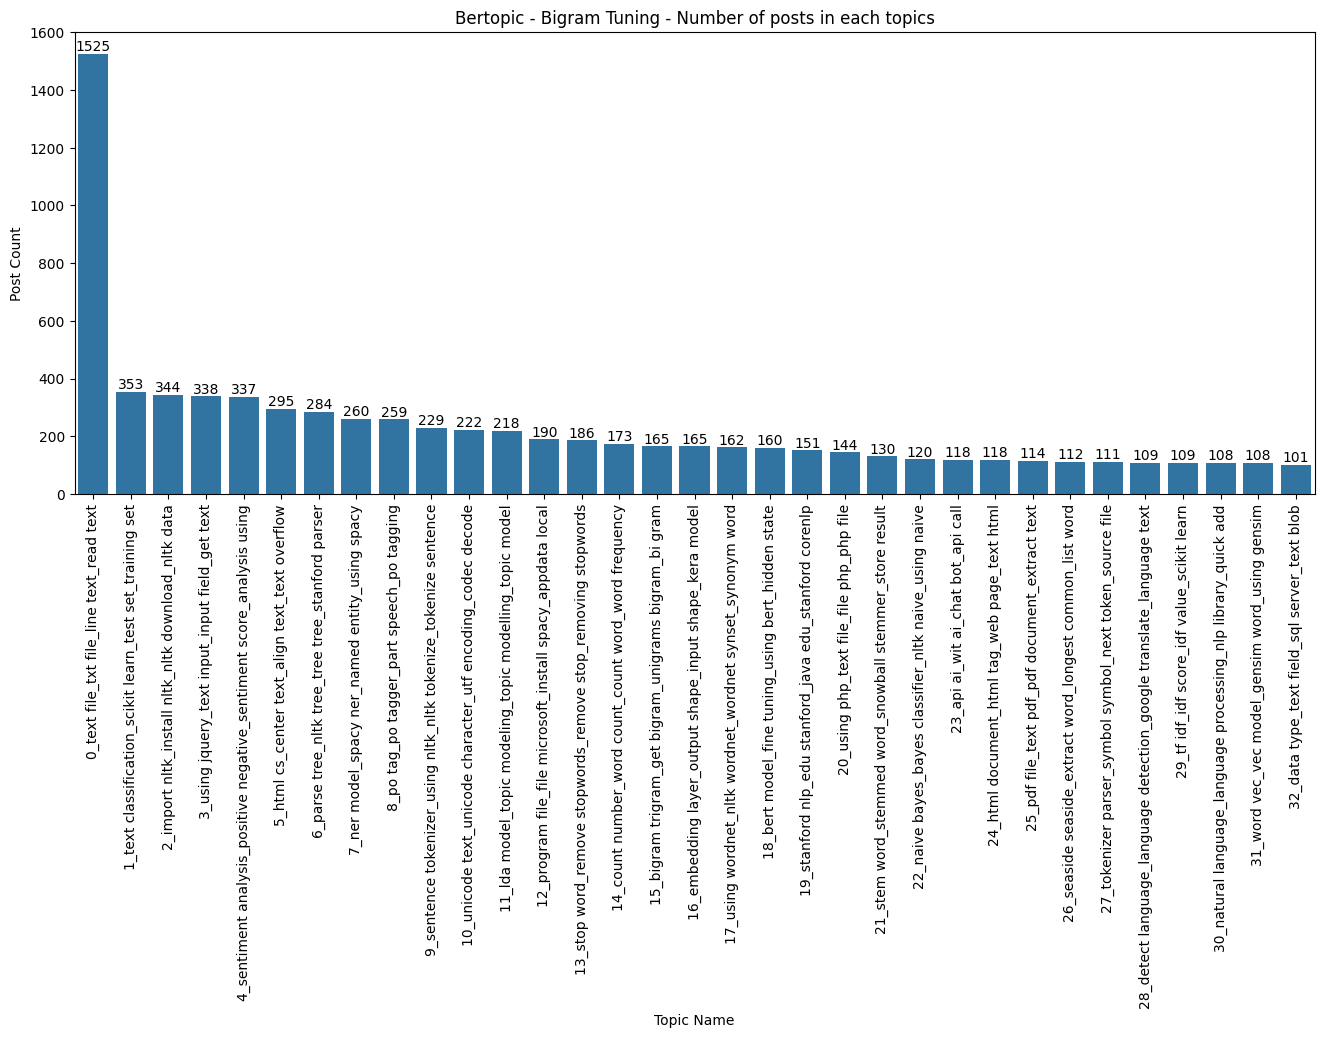

In [48]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=tune_bigram_topic_pd['Name'][1:34], y=tune_bigram_topic_pd['Count'][1:34])
ax.bar_label(ax.containers[0])

plt.title('Bertopic - Bigram Tuning - Number of posts in each topics')
plt.xlabel('Topic Name')
plt.ylabel('Post Count')
plt.xticks(rotation=90)
plt.show()

In [49]:
tune_bigram_topic_model.visualize_barchart(top_n_topics=33,
                                    n_words=10,
                                    width=300,
                                    height=300,
                                    title = 'Bertopic - Bigram Tuning - Topic Word Scores')

In [43]:
tune_bigram_topic_model.visualize_topics()

In [44]:
tune_bigram_topic_model.visualize_hierarchy(top_n_topics=34)

In [94]:
tune_bigram_topic_model.visualize_heatmap(n_clusters=32, width=1000, height=1000)

In [95]:
	tune_bigram_topic_model.visualize_term_rank()

In [96]:
tune_bigram_topic_docs = df.join(tune_bigram_topic_model.get_document_info(docs))
tune_bigram_topic_docs.head()

,Title,Description,Creation Time,Link,Clean_Text_Init,Clean_Text_Stopword,Clean_Text_Stopword_Lemma,Document,Topic,Name,Representation,KeyBERT,MMR,POS,Representative_Docs,Top_n_words,Probability,Representative_document
0,Natural language date/time parser for .NET?,<p>Does anyone know of a .NET date/time parser...,22/08/2008 22:45,https://stackoverflow.com/questions/23689/natu...,natural language date time parser for net does...,natural language date time parser net anyone k...,natural language date time parser net anyone k...,natural language date time parser net anyone k...,54,54_extract date_date text_date time_date string,"[extract date, date text, date time, date stri...","[date parsing, parser date, extract date, extr...","[extract date, date text, relative date, find ...","[relative date, natural language, next week, k...",[best way identify extract date text python pa...,extract date - date text - date time - date st...,1.0,False
1,Vista speech recognition in multiple languages,"<p>my primary language is spanish, but I use a...",31/08/2008 1:08,https://stackoverflow.com/questions/36533/vist...,vista speech recognition in multiple languages...,vista speech recognition multiple languages pr...,vista speech recognition multiple language pri...,vista speech recognition multiple language pri...,-1,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...,would like - word vec - look like - something ...,0.0,False
2,How do you implement a &quot;Did you mean&quot;?,<blockquote>\r\n <p><strong>Possible Duplicat...,3/09/2008 10:36,https://stackoverflow.com/questions/41424/how-...,how do you implement did you mean possible dup...,implement mean possible duplicate suppose sear...,implement mean possible duplicate suppose sear...,implement mean possible duplicate suppose sear...,-1,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...,would like - word vec - look like - something ...,0.0,False
3,Is there an algorithm that tells the semantic ...,"<p>input: phrase 1, phrase 2</p>\r\n\r\n<p>out...",15/09/2008 12:26,https://stackoverflow.com/questions/62328/is-t...,is there an algorithm that tells the semantic ...,algorithm tells semantic similarity two phrase...,algorithm tell semantic similarity two phrase ...,algorithm tell semantic similarity two phrase ...,-1,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...,would like - word vec - look like - something ...,0.0,False
4,How to read values from numbers written as words?,<p>As we all know numbers can be written eithe...,16/09/2008 7:47,https://stackoverflow.com/questions/70161/how-...,how to read values from numbers written as wor...,read values numbers written words know numbers...,read value number written word know number wri...,read value number written word know number wri...,-1,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...,would like - word vec - look like - something ...,0.0,False


In [97]:
tune_bigram_topic_docs.to_csv("./tune_bigram_topic_docs.csv", header=True, encoding='utf-8', index=False)

In [98]:
tune_bigram_topic_pd.to_csv("./tune_bigram_topic_representation.csv", header=True, encoding='utf-8', index=False)

# Plot Overtime

In [46]:
tune_bigram_topic_docs["Creation Time"] = pd.to_datetime(tune_bigram_topic_docs["Creation Time"], format='mixed')
tune_bigram_topic_docs["Date"] = tune_bigram_topic_docs["Creation Time"].dt.date
tune_bigram_topic_docs.set_index("Date", inplace=True)
tune_bigram_topic_docs.sort_index(inplace=True)
tune_bigram_topic_docs.head()

,Title,Description,Creation Time,Link,Clean_Text_Init,Clean_Text_Stopword,Clean_Text_Stopword_Lemma,Document,Topic,Name,Representation,KeyBERT,MMR,POS,Representative_Docs,Top_n_words,Probability,Representative_document
Date,,,,,,,,,,,,,,,,,,
2008-02-10,Methods for Geotagging or Geolabelling Text Co...,<p>What are some good algorithms for automatic...,2008-02-10 18:44:00,https://stackoverflow.com/questions/163923/met...,methods for geotagging or geolabelling text co...,methods geotagging geolabelling text content g...,method geotagging geolabelling text content go...,method geotagging geolabelling text content go...,69,69_san francisco_country city_country name_loc...,"[san francisco, country city, country name, lo...","[extracting location, extract placenames, extr...","[san francisco, country city, san bernadino, a...","[postal address, geographical location, new ci...",[text mining word correlation trying make text...,san francisco - country city - country name - ...,0.539402,False
2008-02-11,(human) Language of a document,"<p>Is there a way (a program, a library) to ap...",2008-02-11 18:01:00,https://stackoverflow.com/questions/257125/hum...,human language of document is there way progra...,human language document way program library ap...,human language document way program library ap...,human language document way program library ap...,28,28_detect language_language detection_google t...,"[detect language, language detection, google t...","[detect language, language detection, language...","[detect language, language detection, google t...","[different language, human language, phonetica...",[php library class count word various language...,detect language - language detection - google ...,1.000000,False
2008-03-09,How do you implement a &quot;Did you mean&quot;?,<blockquote>\r\n <p><strong>Possible Duplicat...,2008-03-09 10:36:00,https://stackoverflow.com/questions/41424/how-...,how do you implement did you mean possible dup...,implement mean possible duplicate suppose sear...,implement mean possible duplicate suppose sear...,implement mean possible duplicate suppose sear...,-1,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...,would like - word vec - look like - something ...,0.000000,False
2008-04-10,Theory: &quot;Lexical Encoding&quot;,"<p><strong>I am using the term ""Lexical Encodi...",2008-04-10 14:48:00,https://stackoverflow.com/questions/170452/the...,theory lexical encoding am using the term lexi...,theory lexical encoding using term lexical enc...,theory lexical encoding using term lexical enc...,theory lexical encoding using term lexical enc...,-1,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...,would like - word vec - look like - something ...,0.000000,False
2008-08-04,How to break word after special character like...,<p>Given a relatively simple CSS:</p>\r\n\r\n<...,2008-08-04 00:17:34,https://stackoverflow.com/questions/904/how-to...,how to break word after special character like...,break word special character like hyphens give...,break word special character like hyphen given...,break word special character like hyphen given...,-1,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...,would like - word vec - look like - something ...,0.000000,False


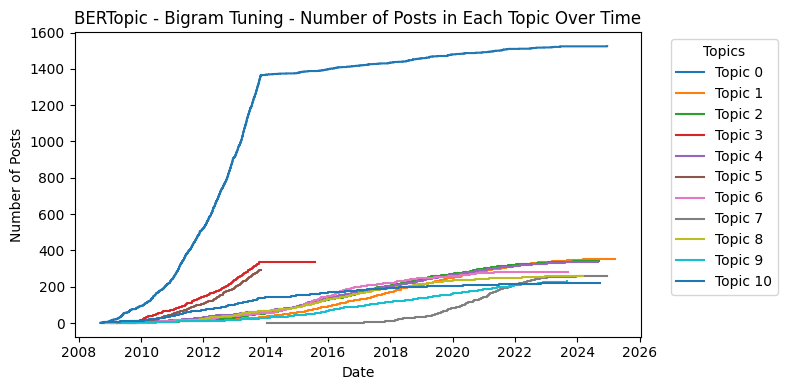

In [69]:
plt.figure(figsize=(8,4))

#for each cluster, create a time series line
for cluster_id in range(0,11):
    if cluster_id!=-1:
        cluster_data = tune_bigram_topic_docs[tune_bigram_topic_docs['Topic'] == cluster_id]

        # Create cumulative count for this cluster
        dates = cluster_data['Creation Time']
        counts = range(1, len(cluster_data) + 1)
        plt.step(dates, counts, where='post', label=f'Topic {cluster_id}')
plt.title('BERTopic - Bigram Tuning - Number of Posts in Each Topic Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend(title='Topics', loc='upper left', bbox_to_anchor=(1.04, 1))
plt.tight_layout()
plt.show()

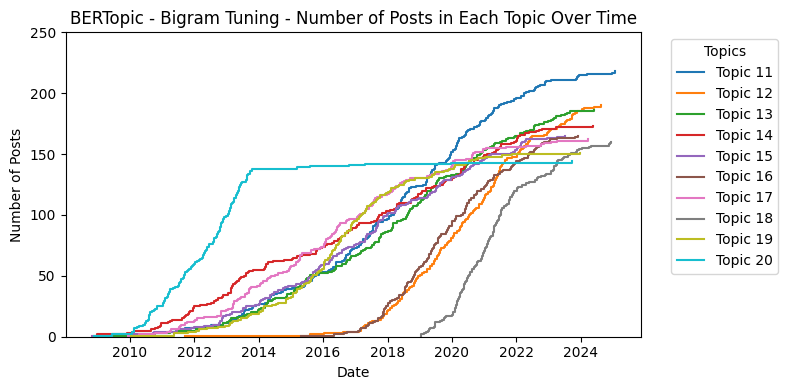

In [66]:
plt.figure(figsize=(8,4))

#for each cluster, create a time series line
for cluster_id in range(11,21):
    if cluster_id!=-1:
        cluster_data = tune_bigram_topic_docs[tune_bigram_topic_docs['Topic'] == cluster_id]

        # Create cumulative count for this cluster
        dates = cluster_data['Creation Time']
        counts = range(1, len(cluster_data) + 1)
        plt.step(dates, counts, where='post', label=f'Topic {cluster_id}')
plt.title('BERTopic - Bigram Tuning - Number of Posts in Each Topic Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.ylim(0, 250)
plt.legend(title='Topics', loc='upper left', bbox_to_anchor=(1.04, 1))
plt.tight_layout()
plt.show()

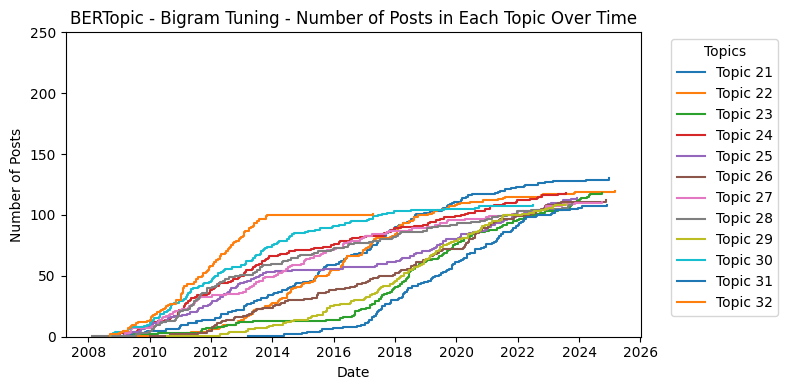

In [67]:
plt.figure(figsize=(8,4))

#for each cluster, create a time series line
for cluster_id in range(21,33):
    if cluster_id!=-1:
        cluster_data = tune_bigram_topic_docs[tune_bigram_topic_docs['Topic'] == cluster_id]

        # Create cumulative count for this cluster
        dates = cluster_data['Creation Time']
        counts = range(1, len(cluster_data) + 1)
        plt.step(dates, counts, where='post', label=f'Topic {cluster_id}')
plt.title('BERTopic - Bigram Tuning - Number of Posts in Each Topic Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.ylim(0, 250)
plt.legend(title='Topics', loc='upper left', bbox_to_anchor=(1.04, 1))
plt.tight_layout()
plt.show()

# Get Silhoullete Score

In [72]:
sentence_model = SentenceTransformer("sentence-transformers/all-MiniLM-L12-v2",  device="cuda")
embeddings = sentence_model.encode(docs, show_progress_bar=False)

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

tune_bigram_u_map_topic_model = BERTopic(n_gram_range = (2,2),
                                         representation_model=representation_model,
                                         umap_model=umap_model,
                                         embedding_model=sentence_model)

topics, probs = tune_bigram_u_map_topic_model.fit_transform(docs, embeddings)

In [73]:
# Generate `X` and `labels` only for non-outlier topics (as they are technically not clusters)
umap_embeddings = tune_bigram_u_map_topic_model.umap_model.transform(embeddings)
indices = [index for index, topic in enumerate(topics) if topic != -1]
X = umap_embeddings[np.array(indices)]
labels = [topic for index, topic in enumerate(topics) if topic != -1]

# Calculate silhouette score
silhouette_score(X, labels)

np.float32(0.47613993)

# Document & Topics Analysis

In [99]:
tune_bigram_topic_pd.tail(5)

,Topic,Count,Name,Representation,KeyBERT,MMR,POS,Representative_Docs
203,202,10,202_get updated_based condition_full term_text...,"[get updated, based condition, full term, text...","[removing dataframe, replacing term, replace w...","[text snippet, kj hsa, uid search_text, revers...","[full term, specific type, reverse order, comm...",[dropping word reverse order duplicate using s...
204,203,10,203_feature appear_countvectorizer value_delet...,"[feature appear, countvectorizer value, deleti...","[countvectorizer vocabulary, countvectorizer l...","[feature appear, deleting feature, countvector...","[principal component, large string, full error...",[countvectorizer value work alone classifier g...
205,204,10,204_continue training_last checkpoint_see alph...,"[continue training, last checkpoint, see alpha...","[checkpoint training, decreasing training, tra...","[core training, checkpoint training, train epo...","[last checkpoint, epoch training, worsens eval...",[check via callback alpha decreasing load core...
206,205,10,205_object attribute_using build_vocab_build_v...,"[object attribute, using build_vocab, build_vo...","[build_vocab torchtext, torchtext bucketiterat...","[object attribute, using build_vocab, build_vo...","[english object, special argument, messy data,...",[attributeerror example object attribute insul...
207,206,10,206_data self_self dataset_python lib_file python,"[data self, self dataset, python lib, file pyt...","[huggingface pipelineexception, transformer tr...","[data self, self dataset, python lib, package ...","[key self, frozen parameter, tuned model, unsu...",[huggingface pipeline fine tuned pre trained m...


In [106]:
print(f"Total cluster topic: {len(tune_bigram_topic_pd) - 1}")

Total cluster topic: 207


In [105]:
total_post = len(df)
no_topic = tune_bigram_topic_pd[tune_bigram_topic_pd["Topic"] == -1]
print(f"Total post classify: {total_post - no_topic['Count'].values[0]}")

Total post classify: 13298


In [107]:
tune_bigram_topic_docs.head()

,Title,Description,Creation Time,Link,Clean_Text_Init,Clean_Text_Stopword,Clean_Text_Stopword_Lemma,Document,Topic,Name,Representation,KeyBERT,MMR,POS,Representative_Docs,Top_n_words,Probability,Representative_document
0,Natural language date/time parser for .NET?,<p>Does anyone know of a .NET date/time parser...,22/08/2008 22:45,https://stackoverflow.com/questions/23689/natu...,natural language date time parser for net does...,natural language date time parser net anyone k...,natural language date time parser net anyone k...,natural language date time parser net anyone k...,54,54_extract date_date text_date time_date string,"[extract date, date text, date time, date stri...","[date parsing, parser date, extract date, extr...","[extract date, date text, relative date, find ...","[relative date, natural language, next week, k...",[best way identify extract date text python pa...,extract date - date text - date time - date st...,1.0,False
1,Vista speech recognition in multiple languages,"<p>my primary language is spanish, but I use a...",31/08/2008 1:08,https://stackoverflow.com/questions/36533/vist...,vista speech recognition in multiple languages...,vista speech recognition multiple languages pr...,vista speech recognition multiple language pri...,vista speech recognition multiple language pri...,-1,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...,would like - word vec - look like - something ...,0.0,False
2,How do you implement a &quot;Did you mean&quot;?,<blockquote>\r\n <p><strong>Possible Duplicat...,3/09/2008 10:36,https://stackoverflow.com/questions/41424/how-...,how do you implement did you mean possible dup...,implement mean possible duplicate suppose sear...,implement mean possible duplicate suppose sear...,implement mean possible duplicate suppose sear...,-1,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...,would like - word vec - look like - something ...,0.0,False
3,Is there an algorithm that tells the semantic ...,"<p>input: phrase 1, phrase 2</p>\r\n\r\n<p>out...",15/09/2008 12:26,https://stackoverflow.com/questions/62328/is-t...,is there an algorithm that tells the semantic ...,algorithm tells semantic similarity two phrase...,algorithm tell semantic similarity two phrase ...,algorithm tell semantic similarity two phrase ...,-1,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...,would like - word vec - look like - something ...,0.0,False
4,How to read values from numbers written as words?,<p>As we all know numbers can be written eithe...,16/09/2008 7:47,https://stackoverflow.com/questions/70161/how-...,how to read values from numbers written as wor...,read values numbers written words know numbers...,read value number written word know number wri...,read value number written word know number wri...,-1,-1_would like_word vec_look like_something like,"[would like, word vec, look like, something li...","[word embedding, word vector, python nltk, wor...","[word vec, text file, natural language, doc ve...","[natural language, regular expression, csv fil...",[finding similarity sentence using word vec se...,would like - word vec - look like - something ...,0.0,False


In [119]:
example_topics_pd = pd.DataFrame(tune_bigram_topic_docs[tune_bigram_topic_docs['Topic'] == 0].sample(n=10, random_state=24))
for i in range(1,33):
  example_topics_pd= pd.concat([example_topics_pd,
                                pd.DataFrame(tune_bigram_topic_docs[tune_bigram_topic_docs['Topic'] == i].sample(n=10, random_state=24))]).reset_index(drop=True)

In [121]:
example_topics_pd.columns

Index(['Title', 'Description', 'Creation Time', 'Link', 'Clean_Text_Init',
       'Clean_Text_Stopword', 'Clean_Text_Stopword_Lemma', 'Document', 'Topic',
       'Name', 'Representation', 'KeyBERT', 'MMR', 'POS',
       'Representative_Docs', 'Top_n_words', 'Probability',
       'Representative_document'],
      dtype='object')

In [128]:
final_example_topics_pd = example_topics_pd[['Topic', 'Name', 'Title', 'Link']]
final_example_topics_pd.head()

,Topic,Name,Title,Link
0,0,0_text file_txt file_line text_read text,counting the number of lines in a text file,https://stackoverflow.com/questions/3482064/co...
1,0,0_text file_txt file_line text_read text,bash: check if multiple files in a directory c...,https://stackoverflow.com/questions/18320290/b...
2,0,0_text file_txt file_line text_read text,Learning in C - possible to write/read to a te...,https://stackoverflow.com/questions/7954526/le...
3,0,0_text file_txt file_line text_read text,How do I replace line breaks with spaces in Pr...,https://stackoverflow.com/questions/18155390/h...
4,0,0_text file_txt file_line text_read text,Breaking up (melting) text data in a column in R?,https://stackoverflow.com/questions/16668699/b...


In [138]:
# Make links clickable
# final_example_topics_pd['Link'] = final_example_topics_pd['Link'].apply(lambda x: f'<a href="{x}" target="_blank">{x}</a>')

html_output = """
<style>
  table {
    border-collapse: collapse;
    width: 100%;
    font-family: sans-serif;
  }
  th, td {
    border: 1px solid #ddd;
    padding: 8px;
    text-align: left;
    vertical-align: top;
  }
  th {
    background-color: #f2f2f2;
  }
  tr:nth-child(even) {
    background-color: #f9f9f9;
  }
  td[rowspan] {
    font-weight: bold;
    vertical-align: top;
    text-align: center;
  }
  a {
    color: #0066cc;
    text-decoration: none;
  }
  a:hover {
    text-decoration: underline;
  }
</style>
<table>
  <thead>
    <tr>
      <th>Topic</th>
      <th>Name</th>
      <th>Title</th>
      <th>Link</th>
    </tr>
  </thead>
  <tbody>
"""

# Export to HTML
# html_output = final_example_topics_pd.to_html(escape=False, index=False)

i = 0
# Add each row to the HTML table
for _, row in final_example_topics_pd.iterrows():
    html_output += f"""<tr>"""

    if i == 0:
      html_output += f"""
      <td rowspan="10">{row['Topic']}</td>
      <td rowspan="10">{row['Name']}</td>"""

    html_output += f"""
      <td>{row['Title']}</td>
      <td><a href="{row['Link']}" target="_blank">{row['Link']}</a></td>
    </tr>
    """
    i +=1

    if i == 10:
      i = 0

# Close table and HTML
html_output += """
  </tbody>
</table>
"""

# Save to file
with open("./bertopic_result_stackoverflow_topics.html", "w", encoding="utf-8") as f:
    f.write(html_output)

print("✅ HTML file saved as bertopic_result_stackoverflow_topics.html")


✅ HTML file saved as bertopic_result_stackoverflow_topics.html


In [145]:
an_example_topics_pd = pd.DataFrame(tune_bigram_topic_docs[tune_bigram_topic_docs['Topic'] == 0].sample(n=1, random_state=24))
for i in range(1,33):
  an_example_topics_pd= pd.concat([an_example_topics_pd,
                                pd.DataFrame(tune_bigram_topic_docs[tune_bigram_topic_docs['Topic'] == i].sample(n=1, random_state=24))]).reset_index(drop=True)

pd.set_option('display.max_columns', None)
an_example_topics_pd[['Topic', 'Name', 'Representation', 'Title', 'Link']]

,Topic,Name,Representation,Title,Link
0,0,0_text file_txt file_line text_read text,"[text file, txt file, line text, read text, li...",counting the number of lines in a text file,https://stackoverflow.com/questions/3482064/co...
1,1,1_text classification_scikit learn_test set_tr...,"[text classification, scikit learn, test set, ...",How to train a model to classify input to one ...,https://stackoverflow.com/questions/62677043/h...
2,2,2_import nltk_install nltk_nltk download_nltk ...,"[import nltk, install nltk, nltk download, nlt...",Installing megam for NLTK on Windows,https://stackoverflow.com/questions/46852316/i...
3,3,3_using jquery_text input_input field_get text,"[using jquery, text input, input field, get te...",Remove all HTMLtags in a string (with the jque...,https://stackoverflow.com/questions/7889765/re...
4,4,4_sentiment analysis_positive negative_sentime...,"[sentiment analysis, positive negative, sentim...",How to calculate the quality of comments using...,https://stackoverflow.com/questions/76927485/h...
5,5,5_html cs_center text_align text_text overflow,"[html cs, center text, align text, text overfl...",How to center text vertically in HTML using CS...,https://stackoverflow.com/questions/2943234/ho...
6,6,6_parse tree_nltk tree_tree tree_stanford parser,"[parse tree, nltk tree, tree tree, stanford pa...",How to do a Tree Transfer in prolog for MT,https://stackoverflow.com/questions/19580566/h...
7,7,7_ner model_spacy ner_named entity_using spacy,"[ner model, spacy ner, named entity, using spa...",Remove training data from spacy model,https://stackoverflow.com/questions/60970109/r...
8,8,8_po tag_po tagger_part speech_po tagging,"[po tag, po tagger, part speech, po tagging, t...","NLTK POS tags extraction, tried key, values bu...",https://stackoverflow.com/questions/37234753/n...
9,9,9_sentence tokenizer_using nltk_nltk tokenize_...,"[sentence tokenizer, using nltk, nltk tokenize...",Why can&#39;t I tokenize text in languages oth...,https://stackoverflow.com/questions/72279174/w...


In [144]:
# an_example_topics_pd.to_csv("./an_example_final_bertopic_tune_bigram.csv", header=True, encoding='utf-8', index=False)

# Test Reduce Topics

In [79]:
tune_bigram_u_map_topic_model.reduce_topics(docs, nr_topics="auto")

In [85]:
tune_bigram_topic_reduce_pd = tune_bigram_u_map_topic_model.get_topic_info()
tune_bigram_topic_reduce_pd

,Topic,Count,Name,Representation,KeyBERT,MMR,POS,Representative_Docs
0,-1,10820,-1_would like_word vec_look like_text file,"[would like, word vec, look like, text file, s...","[using word, word list, word text, word embedd...","[word vec, text file, doc vec, word vector, te...","[regular expression, csv file, natural languag...",[gensim doc vec intersect_word vec_format comm...
1,0,9383,0_text file_would like_look like_txt file,"[text file, would like, look like, txt file, s...","[text file, line file, file text, txt file, fi...","[text file, sentiment analysis, stanford nlp, ...","[natural language, regular expression, better ...",[read text file word word using linq learning ...
2,1,708,1_draw text_html cs_font size_would like,"[draw text, html cs, font size, would like, ce...","[text property, cs text, text box, text div, c...","[draw text, html cs, center text, line text, a...","[next line, long text, vertical align, right c...",[option display text degree angle browser requ...
3,2,441,2_using jquery_text input_change text_get text,"[using jquery, text input, change text, get te...","[text jquery, jquery text, jquery change, html...","[change text, text jquery, jquery text, input ...","[specific text, select text, plain text, javas...",[using jquery change html text input password ...
4,3,193,3_html tag_html document_html file_text html,"[html tag, html document, html file, text html...","[parse html, html parser, text html, extractin...","[html document, html file, text html, extract ...","[plain text, beautiful soup, aenean commodo, c...",[extracting text html file using python would ...
...,...,...,...,...,...,...,...,...
60,59,11,59_memory error_gb ram_unable allocate_memorye...,"[memory error, gb ram, unable allocate, memory...","[memoryerror error, memoryerror unable, gettin...","[memory error, gb ram, unable allocate, memory...","[unable allocate, sparse matrix, large data, d...",[memoryerror scikit even sparse matrix running...
61,60,11,60_maxent classifier_maximum entropy_nltk clas...,"[maxent classifier, maximum entropy, nltk clas...","[classify maxentclassifier, example maxentclas...","[maxent classifier, maximum entropy, nltk clas...","[maximum entropy, invalid value, maximum numbe...",[stuck using megam python nltk classify maxent...
62,61,11,61_qr code_transformation vector_compression a...,"[qr code, transformation vector, compression a...","[text compression, compression algorithm, comp...","[qr code, compression algorithm, text compress...","[qr code, compress text, possible compress, re...",[compress pair word infinitive inflection larg...
63,62,11,62_limit text_non jquery_method jquery_reforma...,"[limit text, non jquery, method jquery, reform...","[jquery shortening, text length, text shorteni...","[limit text, reformat text, div class, jquery ...","[div class, certain number, simple task, last ...",[javascript code reformat text based desired c...


In [81]:
len(tune_bigram_topic_reduce_pd)

65

In [87]:
tune_bigram_u_map_topic_model.visualize_topics()

In [88]:
tune_bigram_u_map_topic_model.visualize_barchart(top_n_topics=33,
                                    n_words=10,
                                    width=300,
                                    height=300,
                                    title = 'Bertopic - Bigram Tuning Reduce - Topic Word Scores')

In [89]:
len(tune_bigram_topic_pd[tune_bigram_topic_pd['Count'] >= 100])

34

# Manual Reduce Topics

In [90]:
tune_bigram_u_map_topic_model.reduce_topics(docs, nr_topics=32)

In [91]:
tune_bigram_u_map_topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,MMR,POS,Representative_Docs
0,-1,10820,-1_would like_word vec_text file_look like,"[would like, word vec, text file, look like, s...","[word embedding, word text, using word, word v...","[word vec, text file, word vector, text classi...","[regular expression, csv file, natural languag...",[gensim doc vec intersect_word vec_format comm...
1,0,9737,0_text file_would like_look like_word vec,"[text file, would like, look like, word vec, s...","[text file, file text, line file, txt file, li...","[text file, word vec, sentiment analysis, stan...","[natural language, regular expression, better ...",[strip unwanted line text file project writing...
2,1,893,1_would like_draw text_html cs_text box,"[would like, draw text, html cs, text box, tex...","[color text, text color, text change, change t...","[draw text, html cs, text box, center text, te...","[dynamic text, different color, rich text, nex...",[text color change hover button trying change ...
3,2,504,2_using jquery_text input_text element_change ...,"[using jquery, text input, text element, chang...","[text jquery, jquery text, jquery change, jque...","[text element, change text, text jquery, jquer...","[specific text, select text, plain text, javas...",[get text parent element using jquery div cont...
4,3,254,3_html tag_html document_plain text_html file,"[html tag, html document, plain text, html fil...","[html parser, text html, html text, html txt, ...","[html document, html file, text html, extract ...","[plain text, beautiful soup, regular expressio...",[extracting text html file using python would ...
5,4,159,4_text file_using php_file php_file using,"[text file, using php, file php, file using, t...","[php file, php read, text php, php text, file ...","[txt file, php file, php text, line text, text...","[plain text, multidimensional array, white spa...",[read data text file php wondering read text f...
6,5,150,5_elastic search_custom analyzer_freq term_tok...,"[elastic search, custom analyzer, freq term, t...","[apache solr, apache lucene, using lucene, luc...","[elastic search, custom analyzer, token filter...","[elastic search, freq term, standard analyzer,...",[problem using solr worddelimiterfilter test u...
7,6,145,6_text image_image text_add text_image file,"[text image, image text, add text, image file,...","[text image, image text, text imagebutton, ima...","[text image, image text, add text, write text,...","[ppm image, objective iphone, bottom button, a...",[read text image iphone want read text image t...
8,7,137,7_hugging face_google colab_following error_cu...,"[hugging face, google colab, following error, ...","[runtimeerror cuda, cuda error, runtimeerror f...","[google colab, huggingface transformer, huggin...","[fine tuning, jupyter lab, gb memory, total ca...",[import name split_torch_state_dict_into_shard...
9,8,118,8_xml file_using xslt_plain text_xslt file,"[xml file, using xslt, plain text, xslt file, ...","[text xml, file xml, xml document, xml file, x...","[xml file, using xslt, xslt file, convert xml,...","[plain text, textual content, inner xml, low o...",[ignore text inside xml element parsing text s...


In [93]:
tune_bigram_u_map_topic_model.visualize_barchart(top_n_topics=33,
                                    n_words=10,
                                    width=300,
                                    height=300,
                                    title = 'Bertopic - Bigram Tuning Manual Reduce - Topic Word Scores')